#PZSIB 5 - Data Analytics
## Syntax Code Python Exploratory Data Analysis
Nama: A'idah Eka Septiana

# Data Preparation

In [ ]:
#Import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [ ]:
#Raw Dataset
df = pd.read_csv('https://raw.githubusercontent.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/master/datasets/number-of-natural-disaster-events.csv')

In [ ]:
#Menampilkan 5 data teratas
df.head(5)

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [ ]:
#Menampilkan Katagori dan banyak laporan dalam Dataframe 'Entity'
data = df['Entity'].value_counts()

category = data.index
frequency = data.values

print(category)
print(frequency)

Index(['All natural disasters', 'Earthquake', 'Extreme weather', 'Flood',
       'Landslide', 'Volcanic activity', 'Drought', 'Wildfire',
       'Extreme temperature', 'Mass movement (dry)', 'Impact'],
      dtype='object')
[119 115 115  95  80  78  73  62  57  33   1]


# Data Cleansing

In [ ]:
#Menampilkan Informasi Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Entity                                                     828 non-null    object 
 1   Code                                                       0 non-null      float64
 2   Year                                                       828 non-null    int64  
 3   Number of reported natural disasters (reported disasters)  828 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 26.0+ KB


In [ ]:
#Menghapus Dataframe 'Code' Karena berisi NaN
df.drop(columns=['Code'], inplace=True)
df

,Entity,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,1900,5
1,All natural disasters,1901,2
2,All natural disasters,1902,9
3,All natural disasters,1903,8
4,All natural disasters,1904,2
...,...,...,...
823,Wildfire,2014,4
824,Wildfire,2015,12
825,Wildfire,2016,10
826,Wildfire,2017,13


In [ ]:
#Menampilkan Informasi Dataframe Setelah Menghapus Dataframe 'Code'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 3 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Entity                                                     828 non-null    object
 1   Year                                                       828 non-null    int64 
 2   Number of reported natural disasters (reported disasters)  828 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 19.5+ KB


In [ ]:
#Menampilkan Kolom Dataframe
print(df.columns)

Index(['Entity', 'Year',
       'Number of reported natural disasters (reported disasters)'],
      dtype='object')


In [ ]:
#Mengubah Nama Pada Dataframe
df = df. rename(columns = {
    'Entity' : 'Entity',
    'Year'  : 'Year',
    'Number of reported natural disasters (reported disasters)' : 'Reported Disasters'
})
df.head(3)

,Entity,Year,Reported Disasters
0,All natural disasters,1900,5
1,All natural disasters,1901,2
2,All natural disasters,1902,9


In [ ]:
#Mengubah Tipe Data Year Menjadi Int 32
df.Year.astype('int32')

0      1900
1      1901
2      1902
3      1903
4      1904
       ... 
823    2014
824    2015
825    2016
826    2017
827    2018
Name: Year, Length: 828, dtype: int32

In [ ]:
#Mengubah Tipe Data 'Year' Menjadi Datetime dan Menampilkan Informasi Data Frame
df.Year = pd.to_datetime(df.Year, format='%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Entity              828 non-null    object        
 1   Year                828 non-null    datetime64[ns]
 2   Reported Disasters  828 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 19.5+ KB


In [ ]:
#Memisahkan Tipe Data Numerik dan Non Numerik
df_cat = df.select_dtypes(exclude=[np.number])
df_num = df.select_dtypes(include=[np.number])

In [ ]:
#Menampiklan Katagori Non Numerik
df_cat

,Entity,Year
0,All natural disasters,1900-01-01
1,All natural disasters,1901-01-01
2,All natural disasters,1902-01-01
3,All natural disasters,1903-01-01
4,All natural disasters,1904-01-01
...,...,...
823,Wildfire,2014-01-01
824,Wildfire,2015-01-01
825,Wildfire,2016-01-01
826,Wildfire,2017-01-01


In [ ]:
#Menampilkan Tipe Data Numerik
df_num

,Reported Disasters
0,5
1,2
2,9
3,8
4,2
...,...
823,4
824,12
825,10
826,13


In [ ]:
#Meriksa Adanya Duplikasi Dalam Data
print(df['Entity'].duplicated().any())
print(df['Year'].duplicated().any())
print(df['Reported Disasters'].duplicated().any())

True
True
True


In [ ]:
#Menampilkan Statistik Deskriptif dari Kolom Numerik Pada Data Frame
df.describe()

,Reported Disasters
count,828.000000
mean,31.913043
std,67.393086
min,1.000000
25%,2.000000
50%,7.000000
75%,23.000000
max,432.000000


# Barplot

In [ ]:
# Melihat Jumlah Persebaran 'Entity' pada Tahun 2014
df_2014 = df[df['Year'].isin(['2014'])]
df_grouped = df_2014.groupby(['Entity'])['Reported Disasters'].sum().reset_index()
df_grouped

,Entity,Reported Disasters
0,All natural disasters,320
1,Drought,18
2,Earthquake,26
3,Extreme temperature,17
4,Extreme weather,99
5,Flood,135
6,Landslide,15
7,Volcanic activity,6
8,Wildfire,4


In [ ]:
# Melihat Jumlah Persebaran 'Entity' pada Tahun 2015
df_2015 = df[df['Year'].isin(['2015'])]
df_grouped = df_2015.groupby(['Entity'])['Reported Disasters'].sum().reset_index()
df_grouped

,Entity,Reported Disasters
0,All natural disasters,380
1,Drought,28
2,Earthquake,23
3,Extreme temperature,12
4,Extreme weather,118
5,Flood,160
6,Landslide,20
7,Mass movement (dry),1
8,Volcanic activity,6
9,Wildfire,12


In [ ]:
# Melihat Jumlah Persebaran 'Entity' pada Tahun 2016
df_2016 = df[df['Year'].isin(['2016'])]
df_grouped = df_2016.groupby(['Entity'])['Reported Disasters'].sum().reset_index()
df_grouped

,Entity,Reported Disasters
0,All natural disasters,325
1,Drought,15
2,Earthquake,30
3,Extreme temperature,12
4,Extreme weather,84
5,Flood,161
6,Landslide,13
7,Wildfire,10


In [ ]:
# Melihat Jumlah Persebaran 'Entity' pada Tahun 2017
df_2017 = df[df['Year'].isin(['2017'])]
df_grouped = df_2017.groupby(['Entity'])['Reported Disasters'].sum().reset_index()
df_grouped

,Entity,Reported Disasters
0,All natural disasters,276
1,Drought,7
2,Earthquake,19
3,Extreme temperature,11
4,Extreme weather,85
5,Flood,114
6,Landslide,25
7,Volcanic activity,2
8,Wildfire,13


In [ ]:
# Melihat Jumlah Persebaran 'Entity' pada Tahun 2018
df_2018 = df[df['Year'].isin(['2018'])]
df_grouped = df_2018.groupby(['Entity'])['Reported Disasters'].sum().reset_index()
df_grouped

,Entity,Reported Disasters
0,All natural disasters,282
1,Drought,13
2,Earthquake,20
3,Extreme temperature,25
4,Extreme weather,84
5,Flood,109
6,Landslide,13
7,Mass movement (dry),1
8,Volcanic activity,7
9,Wildfire,10


In [ ]:
# Menampilkan jumlah data laporan berdasarkan kolom Entity
df.groupby('Entity').sum()

,Reported Disasters
Entity,
All natural disasters,13212
Drought,727
Earthquake,1372
Extreme temperature,575
Extreme weather,4129
Flood,4960
Impact,1
Landslide,712
Mass movement (dry),57


### Barplot Horizontal

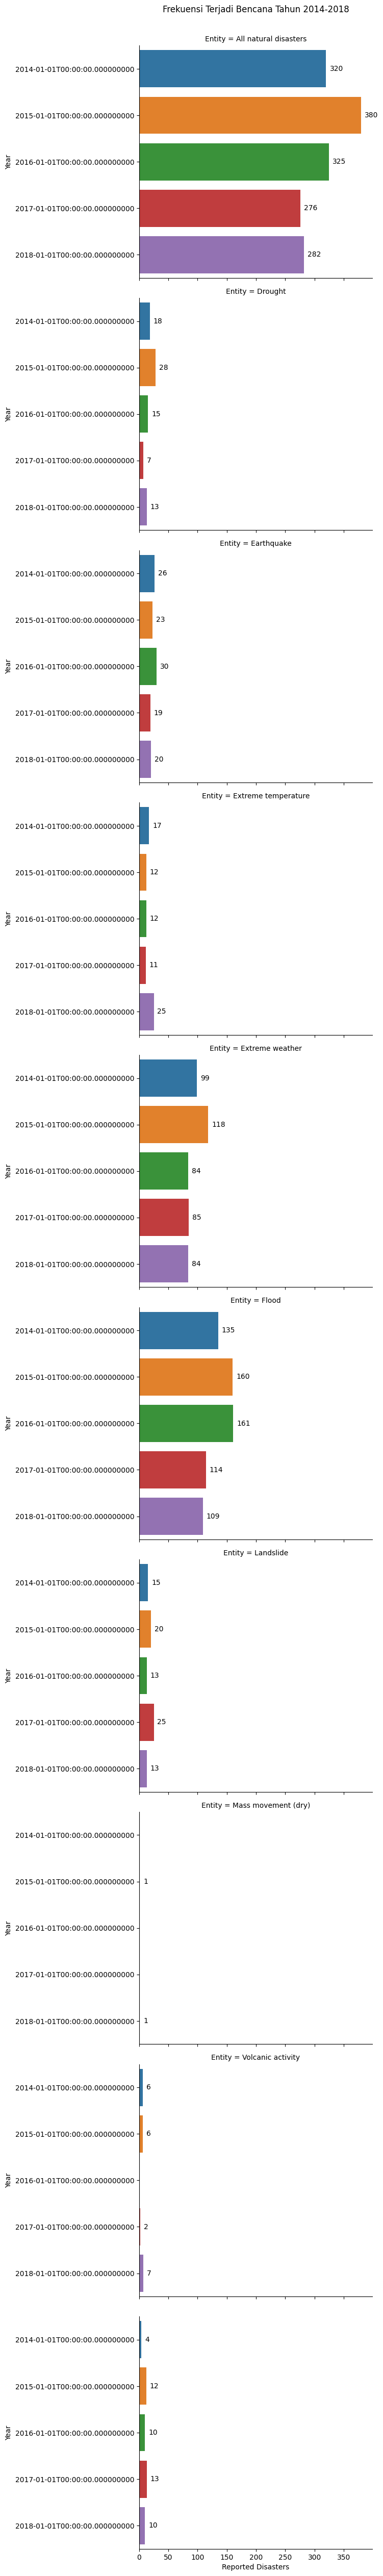

In [ ]:
# Membuat DataFrame Baru dengan nama df_2014_2018
df_2014_2018 = df[df['Year'].isin(['2014', '2015', '2016', '2017', '2018'])]

#Membuat Sumbu Y untuk 'Year' dan Sumbu X untuk 'Reported Disasters'
g = sns.catplot(kind='bar', data=df_2014_2018, y='Year', x='Reported Disasters', row='Entity', aspect=1.5)

# Menambahkan label jumlah pada setiap batang
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')

# Menambahkan judul pada plot
plt.title('Frekuensi Terjadi Bencana Tahun 2014-2018', y=10.9)

# Menampilkan Plot
plt.show()


### Barplot Vertikal

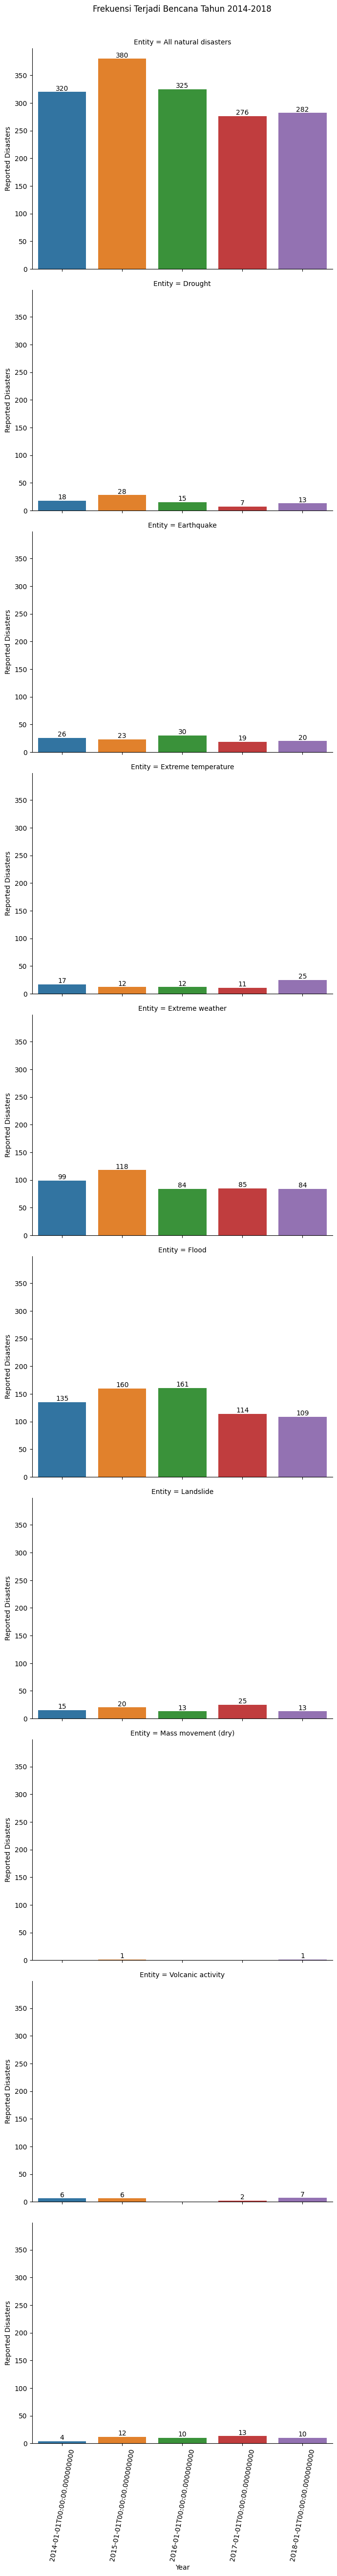

In [ ]:
# Membuat DataFrame Baru dengan nama df_2014_2018
df_2014_2018 = df[df['Year'].isin(['2014', '2015', '2016', '2017', '2018'])]

#Membuat Sumbu Y untuk 'Reported Disasters'X dan Sumbu X untuk 'Year'
g = sns.catplot(kind='bar', data=df_2014_2018, y='Reported Disasters', x='Year', row='Entity', aspect=1.5)

# Mengatur Rotasi Label
plt.xticks(rotation=80)

# Menambahkan label jumlah pada setiap batang
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Menambahkan judul pada plot
plt.title('Frekuensi Terjadi Bencana Tahun 2014-2018', y=11)

# Menampilkan Plot
plt.show()

###Berdasarkan Barplot diatas di dapatkan bahwa:
1.   Jumlah Frekuensi tentang semua bencana alam dengan variabel `All natural disasters` mencapai puncak tertinggi pada tahun 2015, dengan 380 Frekuensi. Kemudian, tahun disusul pada tahun 2016 dengan 325 laporan, diikuti oleh tahun 2014 dengan 320 Frekuensi. Jumlah laporan berkurang pada tahun 2018 menjadi Frekuensi. Pada tahun 2017, jumlah laporan tentang bencana alam mencapai yang terendah, yaitu hanya 26 Frekuensi yang terjadi.
2.   Frekuensi bencana alam variabel `Drought` mencapai puncak jumlahnya pada tahun 2015, dengan total 28 laporan. Kemudian, pada tahun 2014 tercatat sebanyak 18 laporan, disusul oleh tahun 2016 dengan 15 laporan. Jumlah laporan mengalami penurunan pada tahun 2018, mencapai 13 laporan. Laporan terendah ditemukan pada tahun 2017, hanya ada 7 laporan yang tercatat.
3.  Frekuensi bencana alam untuk variabel `Earthquake`  mencapai puncak jumlahnya pada tahun 2016, dengan total 30 laporan. Kemudian, pada tahun 2014 tercatat sebanyak 26 laporan, disusul oleh tahun 2015 dengan 23 laporan. Jumlah laporan mengalami penurunan pada tahun 2018, mencapai 20 laporan. Laporan terendah ditemukan pada tahun 2017, hanya ada 19 laporan yang tercatat.
4.  Frekuensi bencana alam untuk variabel `Extreme temperature` mencapai puncak jumlahnya pada tahun 2018, dengan total 25 laporan. Kemudian, pada tahun 2014 tercatat sebanyak 17 laporan, disusul oleh tahun 2015 dan 2016 yang memiliki laporan `Extreme temperature` yang sama banyaknya sebesar 12 laporan. Laporan terendah ditemukan pada tahun 2017, hanya ada 11 laporan yang tercatat.
5.  Frekuensi bencana alam untuk variabel `Extreme weather` mencapai puncak jumlahnya pada tahun 2015, dengan total 118 laporan. Kemudian, pada tahun 2014 tercatat sebanyak 99 laporan. Jumlah laporan mengalami penurunan pada tahun 2017, mencapai 85 laporan. Dan laporan terendah terdapat pada tahun 2016 dan 2018 yang memiliki laporan `Extreme weather` yang sama banyaknya sebesar 84 laporan.
6.   Frekuensi bencana alam variabel `Flood` mencapai puncak jumlahnya pada tahun 2015, dengan total 161 laporan. Kemudian, pada tahun 2015 tercatat sebanyak 160 laporan, disusul oleh tahun 2014 dengan 135 laporan. Jumlah laporan mengalami penurunan pada tahun 2017, mencapai 114 laporan. Laporan terendah ditemukan pada tahun 2018, hanya ada 109 laporan yang tercatat.
7.   Frekuensi bencana alam untuk variabel `Landslide` mencapai puncak jumlahnya pada tahun 2017, dengan total 25 laporan. Kemudian, pada tahun 2015 tercatat sebanyak 20 laporan. Jumlah laporan mengalami penurunan pada tahun 2014, mencapai 15 laporan. Dan laporan terendah terdapat pada tahun 2016 dan 2018 yang memiliki laporan `Landslide` yang sama banyaknya sebesar 13 laporan.
8.  Frekuensi bencana alam untuk variabel `Mass Movement (dry)` memiliki persebaran laporan selama 5 tahun terakhir yang tidak banyak seperti pada variable lainnya yang terdapat pada `Entity`, karena hanya tercatat 1 laporan pada tahun 2015 dan 2018, selama 5 tahun terakhir.
9.  Frekuensi bencana alam untuk variabel `Volcanic activity` memiliki jumlah laporan terbanyak pada tahun 2018 sebanyak 7 laporan, kemudian pada tahun 2014 dan 2015 memiliki jumlah laporan yang sama, sebanyak 6 laporan, pada tahun 2017 tercatat terdapat 2 laporan, dan pada tahun 2016 tidak ada laporan yang tercatat.
10.   Frekuensi bencana alam untuk variabel `Wildfire` mencapai puncak jumlahnya pada tahun 2018, dengan total 25 laporan. Kemudian, pada tahun 2014 tercatat sebanyak 17 laporan, disusul oleh tahun 2015 dan 2016 yang memiliki laporan `Wildfire` yang sama banyaknya sebesar 12 laporan. Laporan terendah ditemukan pada tahun 2017, hanya ada 11 laporan yang tercatat.


Kesimpulan yang dapat ditarik adalah bahwa pada tahun 2015, terdapat jumlah laporan bencana alam tertinggi, mencapai 380 laporan, diikuti oleh tahun 2016 dengan 325 laporan, tahun 2014 dengan 320 laporan, tahun 2018 dengan 282 laporan, dan tahun 2017 dengan jumlah laporan terendah, yaitu 276 laporan.



# Displot

In [ ]:
#Menampilkan banyak laporan berdasarkan kolom Entity
df.groupby('Entity').count()

,Year,Reported Disasters
Entity,,
All natural disasters,119,119
Drought,73,73
Earthquake,115,115
Extreme temperature,57,57
Extreme weather,115,115
Flood,95,95
Impact,1,1
Landslide,80,80
Mass movement (dry),33,33


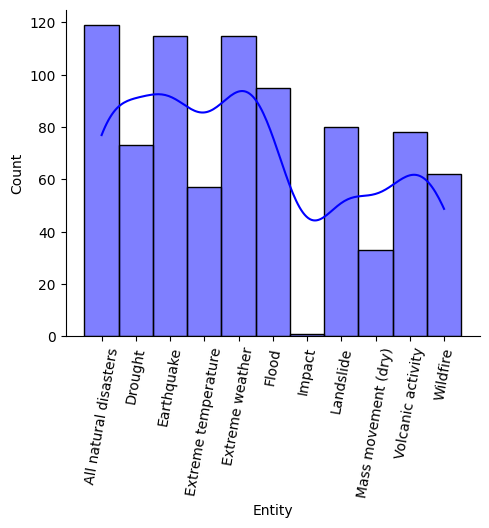

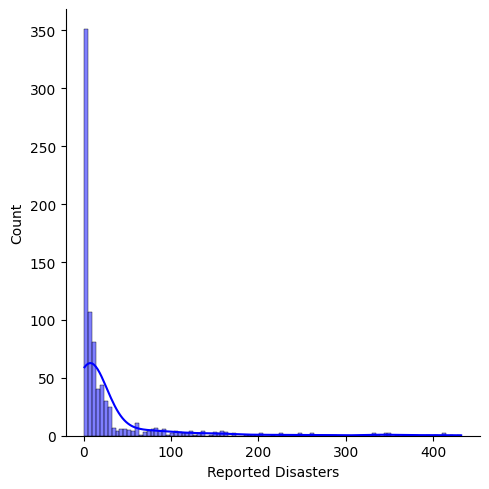

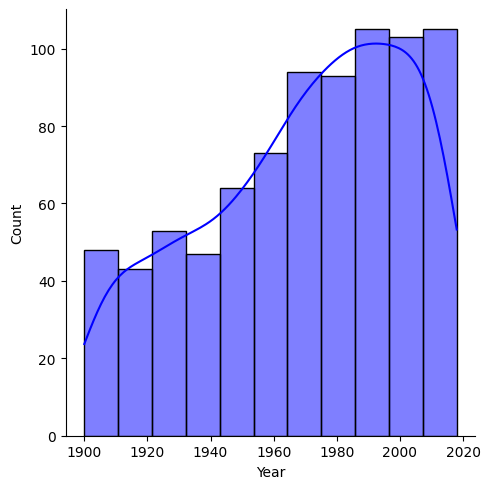

In [ ]:
#Membuat plot untuk kolom "Entity" dari DataFrame, dengan Tinggi = 4, Lebar = 1.25, dan Warna = blue
sns.displot(data=df, x='Entity', kde=True, height=4, aspect=1.25, color = 'blue')

#Mengatur Rotasi Label di sumbu x
plt.xticks(rotation=80)

#Membuat plot untuk kolom "Number of reported natural disasters (reported disasters)" dari DataFrame, dengan Warna = blue
sns.displot(data=df, x='Reported Disasters', kde=True, color = 'blue')

#Menampilkan Plot
plt.show()
#Membuat plot untuk kolom "Number of reported natural disasters (reported disasters)" dari DataFrame, dengan Warna = blue
sns.displot(data=df, x='Year', kde=True, color = 'blue')

#Menampilkan Plot
plt.show()

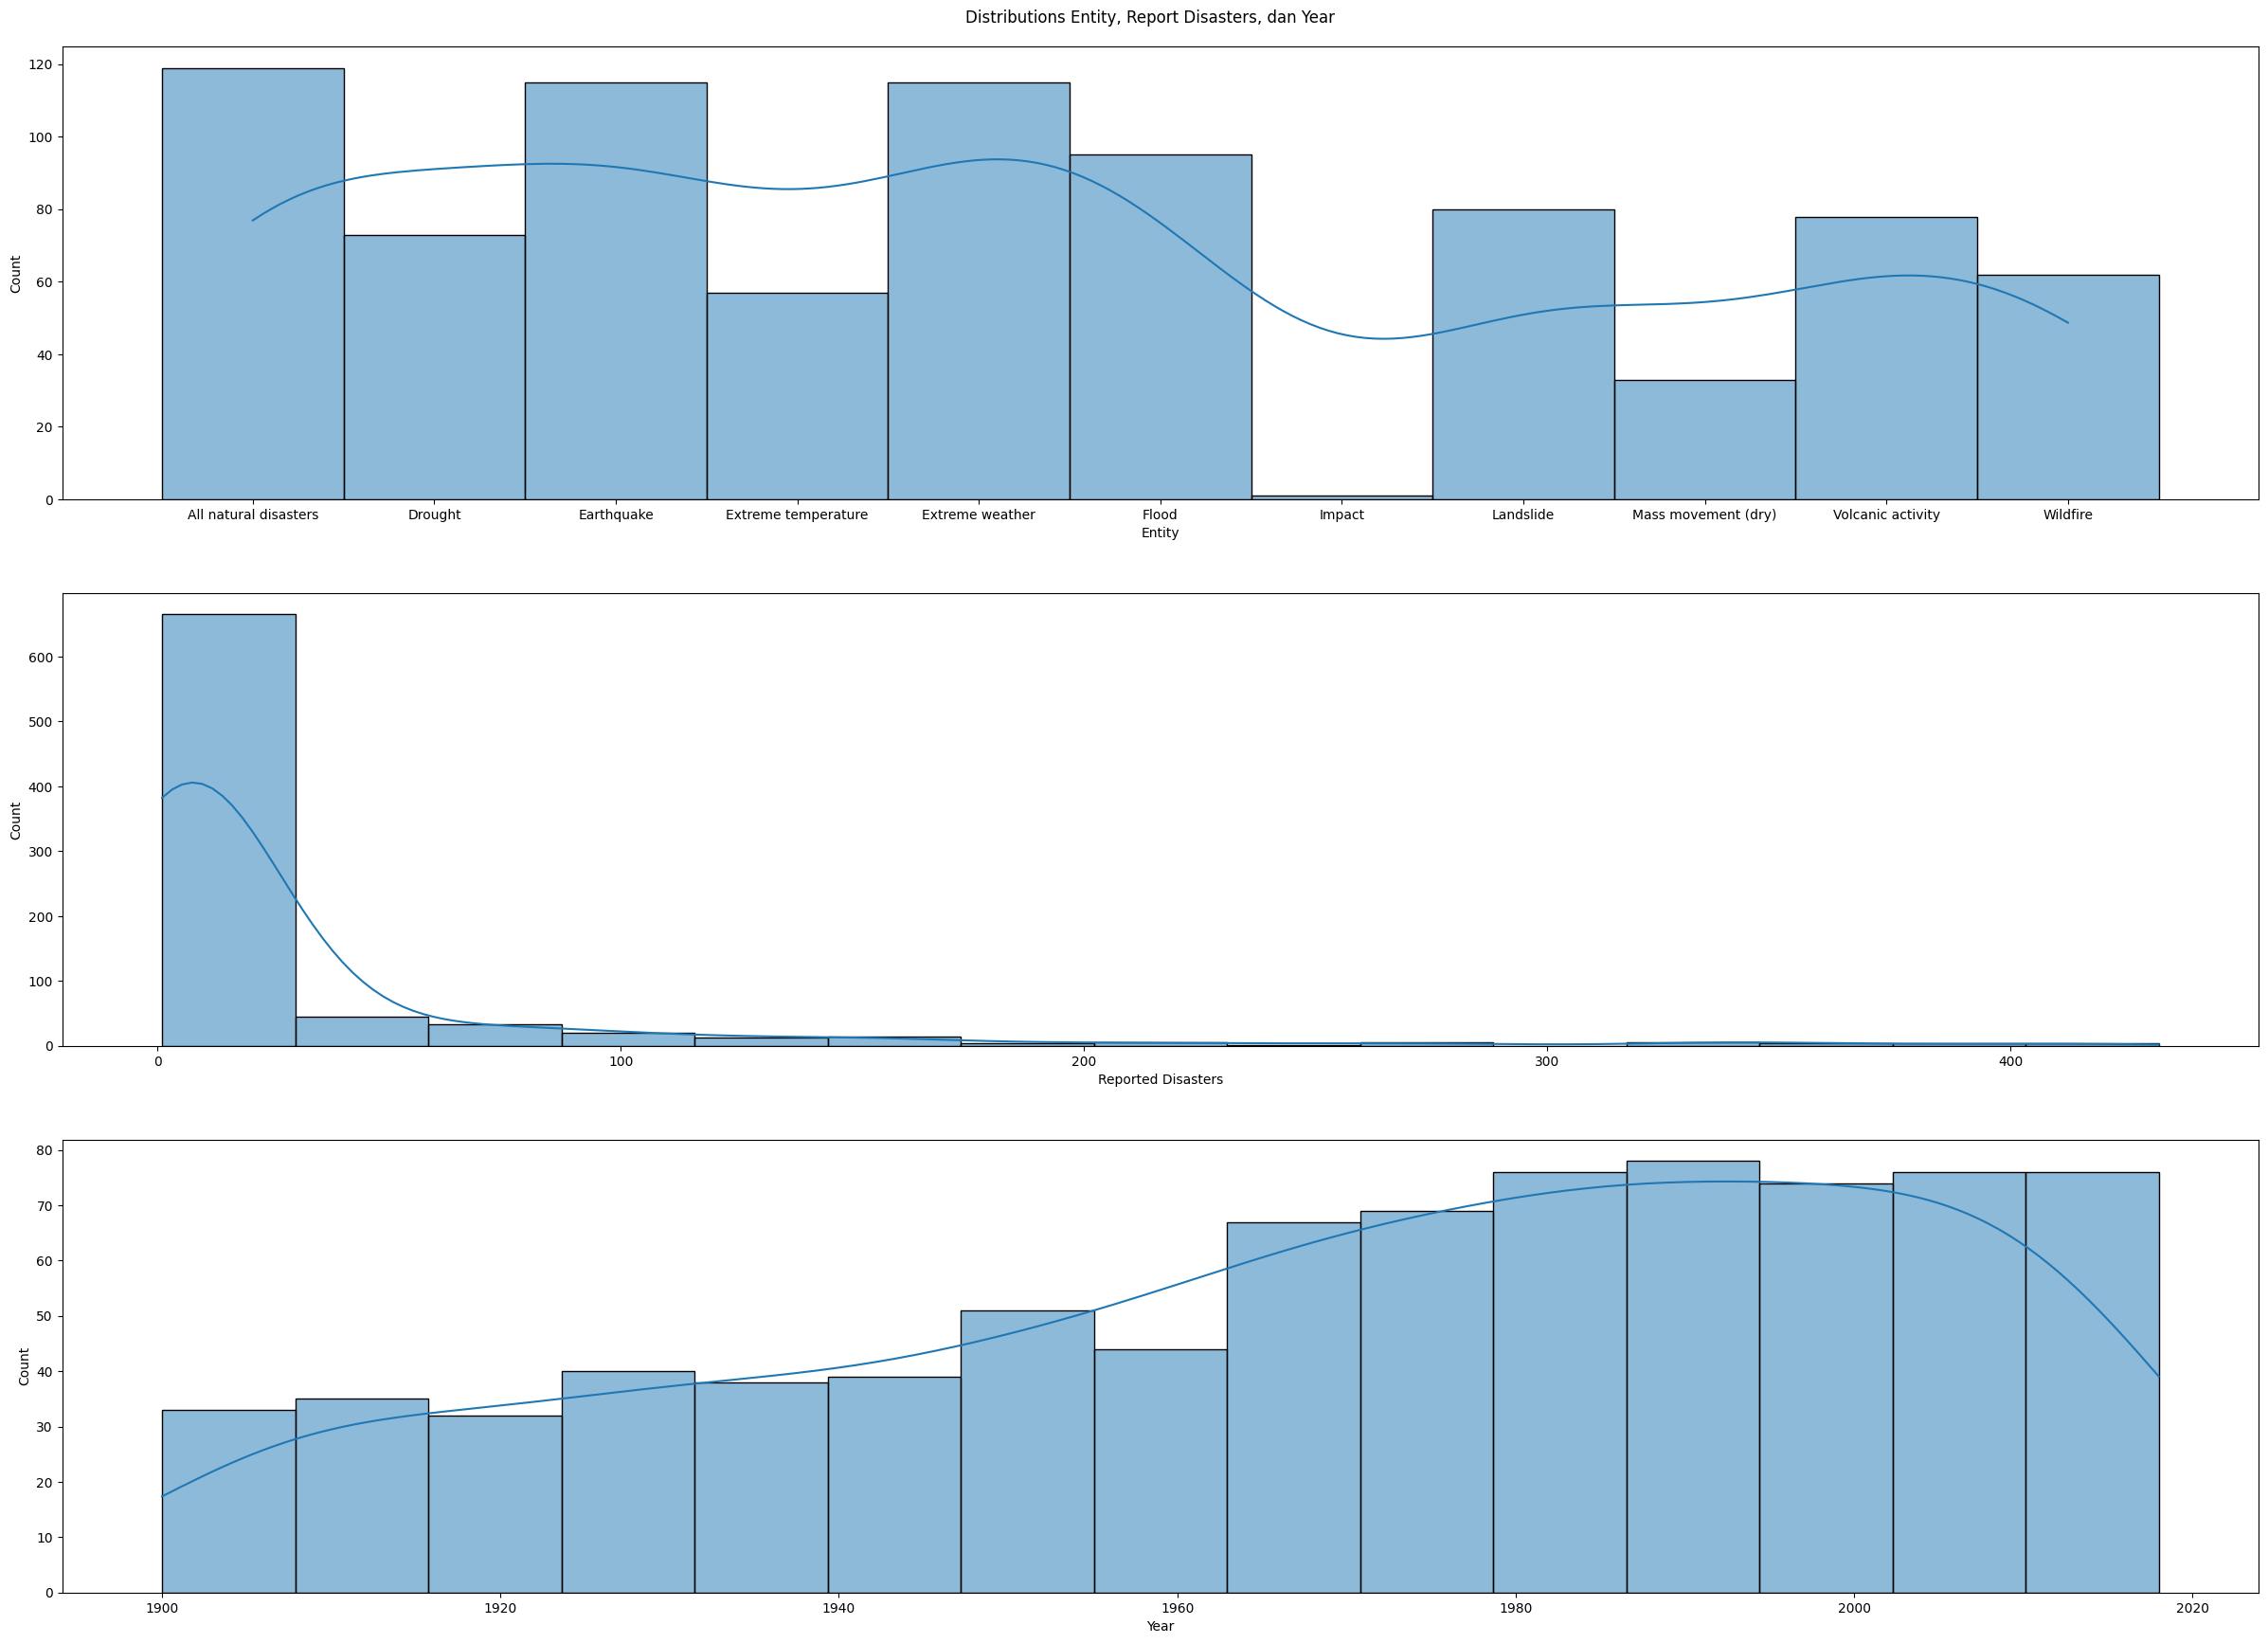

In [ ]:
#Memperbesar Ukuran Displot
#Mengatur Ukuran Plot
fig, axes = plt.subplots(3, 1, figsize=(25,18))
fig.tight_layout(pad=5)

#Memberi Judul Pada Gambar Plot
fig.suptitle('Distributions Entity, Report Disasters, dan Year')

#Membuat plot histogram pada subplot pertama dan Kedua
sns.histplot(ax=axes[0], data=df, x='Entity', kde=True, bins=100)
sns.histplot(ax=axes[1], data=df, x='Reported Disasters', kde=True, bins=15)
sns.histplot(ax=axes[2], data=df, x='Year', kde=True, bins=15)

#Mengatur Label Sumbu X Menggunakan "Entity" dan "Number of reported natural disasters (reported disasters)"
axes[0].set(xlabel='Entity')
axes[1].set(xlabel='Reported Disasters')
axes[2].set(xlabel='Year')

#Menampilkan Plot
plt.show()

Dalam rentang tahun 1900 hingga tahun 2018, walaupun terdapat kenaikan dan penurunan yang tidak signifikan tetapi terlihat adanya peningkatan dalam kurva data, mencapai puncak tertinggi antara tahun 1980 hingga 2018. Kemudian Dari DataFrame `Entity` dapat dilihat bahwa jumlah laporan bervariasi secara signifikan antara jenis peristiwa alam yang berbeda. `All natural disasters` mencatat jumlah laporan tertinggi, yakni 119 laporan. Selanjutnya, `Earthquake` dan `Extreme weather` memiliki jumlah laporan yang sama, masing-masing memiliki 115 laporan, yang juga mempunyai arti tingkat kejadian yang tinggi. Selain itu, kita dapat melihat bahwa `Flood` memiliki jumlah laporan yang cukup tinggi, yakni 95 laporan, mengindikasikan pentingnya bencana ini. Variabel lain seperti `Landslide`, `Volcanic activity`, `Drought`, `Wildfire`, `Extreme temperature`, dan `Mass movement (dry)` juga memiliki jumlah laporan yang beragam, mencerminkan keragaman peristiwa alam yang terdokumentasi dalam dataset ini. Tetapi, `Impact` adalah jenis peristiwa alam yang paling jarang tercatat, hanya dengan 1 laporan, yang mempunyai laporan kejadian yang sangat langka.


In [ ]:
#Mengelompokan Data Dalam Data Frame Untuk Menentukan Rata - rata
df_grouped = df.groupby('Entity')['Reported Disasters'].mean()

In [ ]:
#Menmampilkan Rata - rata
df_grouped

Entity
All natural disasters    111.025210
Drought                    9.958904
Earthquake                11.930435
Extreme temperature       10.087719
Extreme weather           35.904348
Flood                     52.210526
Impact                     1.000000
Landslide                  8.900000
Mass movement (dry)        1.727273
Volcanic activity          3.192308
Wildfire                   6.935484
Name: Reported Disasters, dtype: float64

In [ ]:
#Membuat Variabel baru, dengan menggunakan kolom 'Entity' Index 'Year' dan kolom 'Reported Disasters' sebagai kolom yang nilainya akan diolah.
df_new= df.pivot(columns='Entity', index='Year', values='Reported Disasters')

In [ ]:
#Menampilkan Informasi variabel baru
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 1900-01-01 to 2018-01-01
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   All natural disasters  119 non-null    float64
 1   Drought                73 non-null     float64
 2   Earthquake             115 non-null    float64
 3   Extreme temperature    57 non-null     float64
 4   Extreme weather        115 non-null    float64
 5   Flood                  95 non-null     float64
 6   Impact                 1 non-null      float64
 7   Landslide              80 non-null     float64
 8   Mass movement (dry)    33 non-null     float64
 9   Volcanic activity      78 non-null     float64
 10  Wildfire               62 non-null     float64
dtypes: float64(11)
memory usage: 11.2 KB


# Boxplot

### Boxplot desc
Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (Skewness), ukuran tendensi sentral dan ukuran penyebaran.

Box:
- Garis kiri/bawah = Kuartil 1 (Q1)
- Garis tengah = Kuartil 2 (Q2)
- Garis kanan/atas = Kuartil 3 (Q3) \\
IQR (Interquartile Range atau rentang akar kuartil dari sekumpulan data) = Q3 - Q1 \\

Whisker:
Garis perpanjangan dari box.
- Whisker kiri/bawah: Menunjukkan nilai yang lebih rendah dari kumpulan data yang berada dalam IQR = Q1 - 1,5 x IQR
- Whisker kanan/atas: Menunjukkan nilai yang lebih tinggi dari kumpulan data yang berada dalam IQR = Q3 + 1,5 x IQR

Outlier:
- Outlier Atas: Outlier atas > Q3 + 1,5 x IQR
- Outlier Bawah < Q1 - 1,5 x IQR

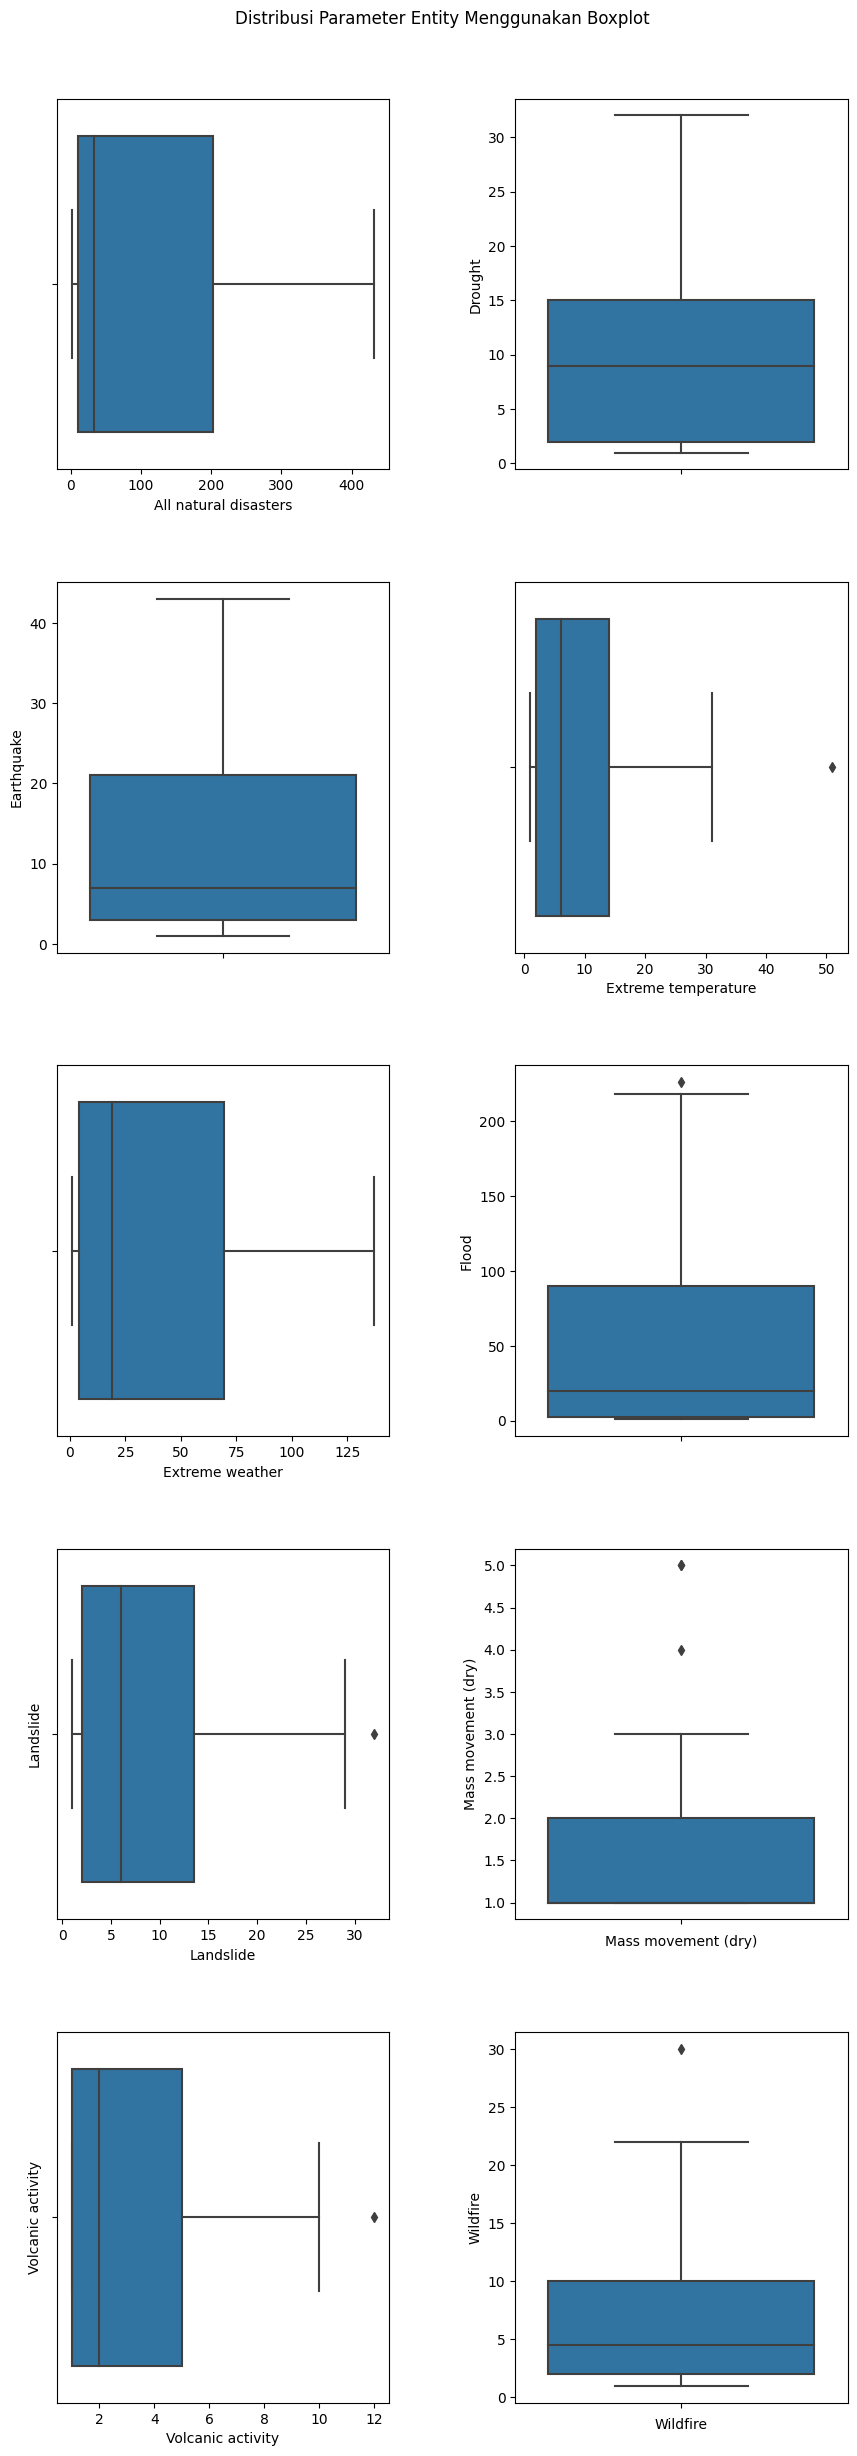

In [ ]:
#Membuat Boxplot dengan ukuran 5 baris dan 2 kolom
fig, axes = plt.subplots(5, 2, figsize=(10,25))
fig.tight_layout(pad=6)

#Menambahkan judul utama (super title)
fig.suptitle('Distribusi Parameter Entity Menggunakan Boxplot', y=1)

#Membuat Boxplot berdasarkan kolom Entity
sns.boxplot(ax=axes[0,0], data=df_new, x='All natural disasters')
sns.boxplot(ax=axes[0,1], data=df_new, y='Drought')
sns.boxplot(ax=axes[1,0], data=df_new, y='Earthquake')
sns.boxplot(ax=axes[1,1], data=df_new, x='Extreme temperature')
sns.boxplot(ax=axes[2,0], data=df_new, x='Extreme weather')
sns.boxplot(ax=axes[2,1], data=df_new, y='Flood')
sns.boxplot(ax=axes[3,0], data=df_new, x='Landslide')
sns.boxplot(ax=axes[3,1], data=df_new, y='Mass movement (dry)')
sns.boxplot(ax=axes[4,0], data=df_new, x='Volcanic activity')
sns.boxplot(ax=axes[4,1], data=df_new, y='Wildfire')

#Memberi Label pada Boxplot
axes[0,0].set(xlabel='All natural disasters')
axes[0,1].set(ylabel='Drought')
axes[1,0].set(ylabel='Earthquake')
axes[1,1].set(xlabel='Extreme temperature')
axes[2,0].set(xlabel='Extreme weather')
axes[2,1].set(ylabel='Flood')
axes[3,0].set(ylabel='Landslide')
axes[3,1].set(xlabel='Mass movement (dry)')
axes[4,0].set(ylabel='Volcanic activity')
axes[4,1].set(xlabel='Wildfire')
plt.show()



*   Pada variable `All natural disasters` terlihat bahwa 75% atau lebih dari 75% banyaknya laporan kurang dari 200, sedangkan sisanya berada pada sekitar 200 sampai 400 laporan.
*   Pada variable `Drought` terlihat bahwa 75% atau lebih dari 75% banyaknya laporan kurang dari 15, sedangkan sisanya berada pada sekitar 15 sampai 32 laporan.
*   Pada variable `Earthquake` terlihat bahwa 75% atau lebih dari 75% banyaknya laporan kurang dari 21, sedangkan sisanya berada pada sekitar 21 sampai 42 laporan.
*   Dalam variable `Extreme temperature`, dapat diamati bahwa sebagian besar laporan atau lebih dari 75% memiliki jumlah kurang dari 15, sementara sebagian kecil lainnya berada dalam kisaran 15 hingga 30 laporan. Hal yang menarik adalah adanya nilai outlier yang signifikan, yaitu angka 50, yang jauh lebih tinggi daripada sebagian besar laporan yang lain.
*   Pada variable `Extreme weather` terlihat bahwa 75% atau lebih dari 75% banyaknya laporan kurang dari 75, sedangkan sisanya berada pada sekitar 75 sampai 130 laporan.
*   Pada variable `Flood` terlihat bahwa 75% atau lebih dari 75% banyaknya laporan kurang dari 90, sedangkan sisanya berada pada sekitar 90 sampai 205 laporan. Dan memiliki nilai outlier di angka 210.
*   Pada variable `Landslide` terlihat bahwa 75% atau lebih dari 75% banyaknya laporan kurang dari 14, sedangkan sisanya berada pada sekitar 14 sampai 29 laporan. Dan memiliki nilai outlier di angka 33.
*   Pada variable `Mass movement (dry) ` terlihat bahwa 75% atau lebih dari 75% banyaknya laporan kurang dari 2, sedangkan sisanya berada pada sekitar 2 sampai 3 laporan. Dan memiliki nilai outlier di angka 4 sampai 5.
*   Pada variable `Volcanic activity` terlihat bahwa 75% atau lebih dari 75% banyaknya laporan kurang dari 5, sedangkan sisanya berada pada sekitar 5 sampai 10 laporan. Dan memiliki nilai outlier di angka 12.
*   Pada variable `Wildfire` terlihat bahwa 75% atau lebih dari 75% banyaknya laporan kurang dari 10, sedangkan sisanya berada pada sekitar 20 sampai 23 laporan. Dan memiliki nilai outlier di angka 30.

# Scatterplot

Mengamati apakah dua kolom/parameter memiliki hubungan atau korelasi tertentu. Scatterplot adalah alat yang baik untuk memvisualisasikan hubungan antara dua nilai.
Scatteplot memuat 3 hubungan:
1.	Pola Hubungan:
Menggambarkan pola hubungan atau pengaruh suatu variable terhadap variable lainnya.
2.	Keeratan Hubungan:
Menggambarkan seberapa kuat suatu variable memberikan pengaruh terhadap variable lainnya.
    *   Jika persebaran titik - titik menyebar ke segala arah tanpa pola khusus maka kekuatannya sangat lemah
    *   Jika menyebar ke semua titik namun mula terbentuk pola tertentu maka hubungan keduanya adalah lemah
    *   Jika titik titik menyebar hampir mengerucut membentuk pola yang jelas, hubungan 2 variabel kuat.
    *   Jika titik titik menyebar menyerupai garis lurus maka hubungannya sangat kuat.
3.	Arah Hubungan:
Menggambarkan arah hubungan atau pengaruh suatu variable terhadap variable lainnya.
    *   Positif, jika nilai variabel y semakin meningkat seiring peningkatan nilai variabel x.
    *   Negatif, jika jika nilai variabel y semakin menurun seiring peningkatan nilai variabel x.




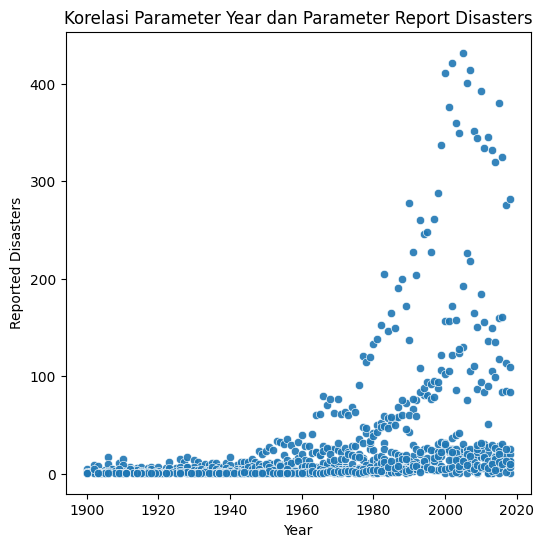

In [ ]:
#Membuat Scatter Plot untuk melihat korelasi antara jumlah bencana alam yang di laporkan berdasarkan tahun.
plt.figure(figsize=(6, 6))
sns.scatterplot(x= "Year", y= "Reported Disasters", data = df, alpha = 0.9)
plt.xlabel ("Year")
plt.ylabel ("Reported Disasters")

#Memberi Judul pada Plot
plt.title ("Korelasi Parameter Year dan Parameter Report Disasters")

#Menampilkan Plot
plt.show()

Dari scatterplot tersebut, dapat disimpulkan bahwa korelasi antara `Year` dengan `Reported Disasters` memiliki persebaran titik-titik data yang cenderung berkumpul di sekitar garis tren. Selain itu, garis tren tersebut cenderung naik, yang mengindikasikan bahwa ketika `Year` semakin meningkat, `Reported Disasters` juga cenderung meningkat. Ini menunjukkan adanya korelasi positif antara `Year` dan jumlah `Reported Disasters`. Dalam kata lain, ada kecenderungan peningkatan jumlah laporan bencana alam seiring berjalannya waktu.

# Pie Chart

In [ ]:
df_grouped = df.groupby('Entity')['Reported Disasters'].count().reset_index().rename(columns= {'Reported Disasters':'Jumlah Laporan'}).sort_values(by='Jumlah Laporan', ascending=False)
df_grouped

,Entity,Jumlah Laporan
0,All natural disasters,119
2,Earthquake,115
4,Extreme weather,115
5,Flood,95
7,Landslide,80
9,Volcanic activity,78
1,Drought,73
10,Wildfire,62
3,Extreme temperature,57
8,Mass movement (dry),33


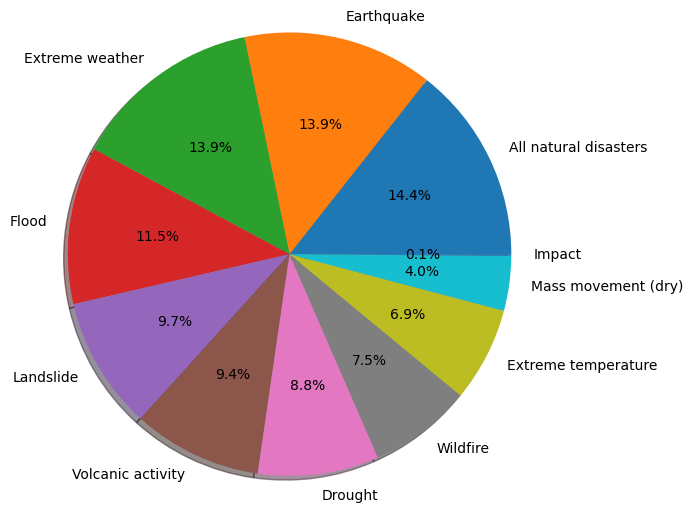

In [ ]:
#Menampilkan Pie Chart untuk semua variabel pada Dataframe Entity.
plt.pie(df_grouped['Jumlah Laporan'], labels=df_grouped['Entity'], autopct='%1.1f%%', radius=1.5, shadow=True)
plt.show()

Berdasarkan visualisasi data dengan Pie Chart, dapat ditarik kesimpulan bahwa berbagai jenis bencana alam memiliki persentase berbeda dalam jumlah total kejadian. Secara khusus, `All Natural Disasters` memiliki persentase sebanyak 14.4%, sementara `Earthquake` maupun `Extreme Weather` memiliki persentase yang sama, yakni sebanyak 13.9%. Disusul oleh `Flood` dengan persentase sebanyak 11.5%, `Landslide` dengan persentase sebanyak 9.7%, dan `Volcanic Activity` dengan persentase sekitar 9.4%. Selanjutnya, `Drought` memiliki persentase sekitar 8.8%, `Wildfire` sebanyak 7.5%, `Extreme Temperature` sebanyak 6.9%, `Mass movement (dry)` sebanyak 4%, dan persentase paling kecil adalah `Impact` dengan hanya sebanyak 0.1%.

Kemudian, dibawah ini saya akan mengelompokkan jumlah laporan yang berada dibawah 95 akan masuk ke dalam Dataframe baru dan masuk dalam kelompok `Others`

In [ ]:
#Mengelompokan data baru berdasarkan jumlah laporan.
df_grouped['New_Entity'] = np.where(df_grouped['Jumlah Laporan'] < 95, 'Others', df_grouped['Entity'])
df_grouped

,Entity,Jumlah Laporan,New_Entity
0,All natural disasters,119,All natural disasters
2,Earthquake,115,Earthquake
4,Extreme weather,115,Extreme weather
5,Flood,95,Flood
7,Landslide,80,Others
9,Volcanic activity,78,Others
1,Drought,73,Others
10,Wildfire,62,Others
3,Extreme temperature,57,Others
8,Mass movement (dry),33,Others


Kolom `New_Entity` merupakan entitas dengan frekuensi kurang dari 95 sebagai `Others`, sementara entitas dengan frekuensi 95 atau lebih tetap memiliki nilai aslinya dalam kolom `Entity`

In [ ]:
#Mengelompokkan data berdasarkan kolom 'New_Entity' dan menghitung jumlah laporan ('Jumlah Laporan') dalam setiap kelompok
df_grouped_1 = df_grouped.groupby('New_Entity')['Jumlah Laporan'].sum().reset_index()
df_grouped_1

,New_Entity,Jumlah Laporan
0,All natural disasters,119
1,Earthquake,115
2,Extreme weather,115
3,Flood,95
4,Others,384


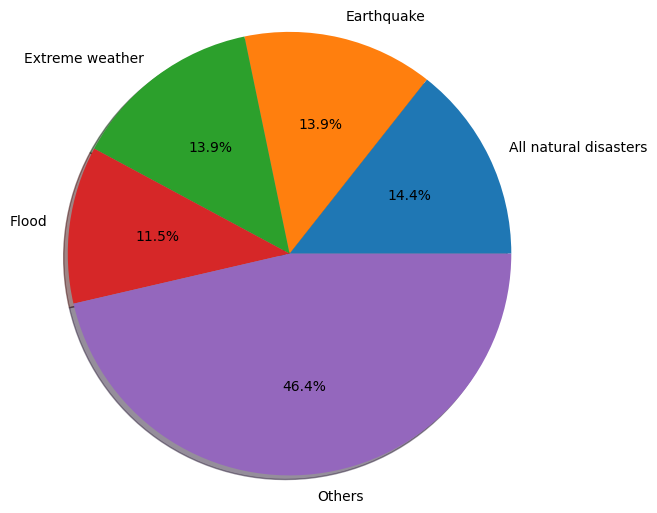

In [ ]:
#Menampilkan Pie Chart
plt.pie(df_grouped_1['Jumlah Laporan'], labels=df_grouped_1['New_Entity'], autopct='%1.1f%%', radius=1.5, shadow=True)
plt.show()

Setelah melakukan pengelompokkan berdasarkan variabel baru `df_grouped_1` yang didasarkan pada kolom `New_Entity` dan `Jumlah Laporan`, hasil dari Pie Chart mengindikasikan bahwa persentase insiden `All Natural Disasters` adalah sekitar 14.4%. Sementara itu, `Earthquake` dan `Extreme Weather` memiliki persentase yang sama sekitar 13.9%. Selain itu, `Flood` memiliki persentase sekitar 11.5%. Ada juga kategori `Others` yang mencakup sekitar 46.4% dari keseluruhan, menggantikan entitas `Landslide`. `Volcanic Activity` memiliki persentase sekitar 9.4%, `Drought` sekitar 8.8%, `Wildfire` sekitar 7.5%, `Extreme Temperature` sekitar 6.9%, `Mass movement (dry)` sekitar 4%, dan `Impact` hanya sekitar 0.1%.

In [ ]:
#Menampilkan informasi Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Entity              828 non-null    object        
 1   Year                828 non-null    datetime64[ns]
 2   Reported Disasters  828 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 19.5+ KB


In [ ]:
# Menampilkan deskripsi cell
df

,Entity,Year,Reported Disasters
0,All natural disasters,1900-01-01,5
1,All natural disasters,1901-01-01,2
2,All natural disasters,1902-01-01,9
3,All natural disasters,1903-01-01,8
4,All natural disasters,1904-01-01,2
...,...,...,...
823,Wildfire,2014-01-01,4
824,Wildfire,2015-01-01,12
825,Wildfire,2016-01-01,10
826,Wildfire,2017-01-01,13


In [ ]:
#Menampilkan Ringkasan Statistik yang terdapat pada Dataframe
df.describe()

,Reported Disasters
count,828.000000
mean,31.913043
std,67.393086
min,1.000000
25%,2.000000
50%,7.000000
75%,23.000000
max,432.000000


[IQR Method Formula](#scrollTo=uZtmZolJEs4i)

In [ ]:
# Metode IQR untuk menghapus nilai outliers/ ekstrim
import numpy as np

q1_mp = np.percentile(df['Reported Disasters'], 25)
q3_mp = np.percentile(df['Reported Disasters'], 75)
iqr_mp = q3_mp - q1_mp

low_whisker = q1_mp - 1.5 * iqr_mp
high_whisker = q3_mp + 1.5 * iqr_mp

df_new = df[(df['Reported Disasters'] >= low_whisker) & (df['Reported Disasters'] <= high_whisker)]
df_new

,Entity,Year,Reported Disasters
0,All natural disasters,1900-01-01,5
1,All natural disasters,1901-01-01,2
2,All natural disasters,1902-01-01,9
3,All natural disasters,1903-01-01,8
4,All natural disasters,1904-01-01,2
...,...,...,...
823,Wildfire,2014-01-01,4
824,Wildfire,2015-01-01,12
825,Wildfire,2016-01-01,10
826,Wildfire,2017-01-01,13


In [ ]:
df_new.describe()

,Reported Disasters
count,706.000000
mean,9.698300
std,10.417439
min,1.000000
25%,2.000000
50%,6.000000
75%,14.000000
max,52.000000


# Interprestasi

Berdasarkan Visualisasi Dataset Number of Natural Disasters (Reported Disasters) dapat disimpullkan bahwa:



1.   Data selama 5 tahun terakhir menunjukkan tren peningkatan jumlah laporan bencana alam, dengan  Tahun 2015 terdapat jumlah laporan bencana alam tertinggi, mencapai 380 laporan, diikuti oleh tahun 2016 dengan 325 laporan, tahun 2014 dengan 320 laporan, tahun 2018 dengan 282 laporan, dan tahun 2017 dengan jumlah laporan terendah, yaitu 276 laporan. Ini menunjukkan fluktuasi dalam jumlah laporan dari tahun ke tahun. Persebaran Bencana alam terbanyak terdapat pada variabel `Extreme Weather` hal ini bisa disebabkan dari beberapa faktor seperti Efek gas rumah kaca, Pemanasan Global, Kerusakan lapisan ozon, Kerusakan fungsi hutan, Penggunaan Cloro Flour Carbon (CFC) yang tidak terkontrol, Gas buang industri. ([Source](https://indonesiabaik.id/infografis/mengenal-perubahan-iklim-faktor-dan-dampaknya)). Sehingga dari Extreme weather tersebut dapat menyebabkan beberapa bencana alam lainnya seperti Panas ekstrem semakin panas, Kebakaran hutan terjadi lebih lama dan lebih luas, Badai menjadi semakin hebat, Kondisi kekeringan masih terus terjadi, Suhu yang lebih hangat mendorong peningkatan curah hujan, Kenaikan permukaan laut menyebabkan banjir,
Badai musim dingin melanda lebih parah ([Source](https://earthjustice.org/feature/how-climate-change-is-fueling-extreme-weather)).

2.   Dari DataFrame `Entity` juga dapat dilihat bahwa jumlah laporan bervariasi secara signifikan antara jenis peristiwa alam yang berbeda. `All natural disasters` mencatat jumlah laporan yakni 119. Pada bencana alam `Earthquake` dan `Extreme Weather` memiliki jumlah laporan yang sama tingginya, masing-masing 115 laporan, yang juga mencerminkan tingkat kejadian yang tinggi. Selain itu, kita dapat melihat bahwa `Flood` memiliki jumlah laporan yang cukup tinggi, yakni 95 laporan, mengindikasikan pentingnya bencana ini. Variabel lain seperti `Landslide`, `Volcanic Activity`, `Drought`, `Wildfire`, `Extreme Temperature`, dan `Mass Movement (dry)` juga memiliki jumlah laporan yang beragam, mencerminkan kumpulan peristiwa alam yang terdokumentasi dalam dataset ini. Tetapi, `Impact` adalah jenis peristiwa alam yang paling jarang tercatat, hanya dengan satu laporan yang memiliki frekuensi langka di dalam data.

3.   Dalam rentang tahun 1900 hingga 2018, walaupun terdapat kenaikan dan penurunan yang tidak signifikan namun terlihat adanya peningkatan dalam kurva data, mencapai puncak tertinggi antara tahun 1980 hingga 2018. Ini menunjukkan peningkatan dalam pelaporan terkait bencana alam.

4.   Pada Boxplot berbagai jenis bencana alam yang diamati, sebagian besar laporan memiliki jumlah yang relatif rendah, dengan lebih dari 75% laporan memiliki jumlah kurang dari nilai tertentu, sesuai dengan jenis bencana yang diamati. Namun, ada beberapa jenis bencana yang menonjol dengan nilai outlier yang signifikan, yang menunjukkan adanya kasus-kasus yang sangat jarang terjadi. Misalnya, pada variabel `Extreme temperature` dan `Extreme weather`, terdapat nilai outlier yang jauh lebih tinggi dibandingkan dengan sebagian besar laporan yang lain, yang dapat menjadi fokus perhatian dalam analisis lebih lanjut. Selain itu, adanya outlier pada beberapa jenis bencana lainnya seperti `Flood`, `Landslide`, `Mass movement (dry)`, `Volcanic activity`, dan `Wildfire` juga mencerminkan variasi ekstrem dalam laporan bencana tersebut.

5.   Pada Scatterplot erdapat korelasi positif antara `Year` dan `Reported Disasters`. Artinya, seiring berjalannya waktu, jumlah laporan bencana alam cenderung meningkat. Hal ini dapat dilihat dari pola titik-titik data yang berkumpul di sekitar garis tren naik pada scatterplot. Tetapi hubungan antara variable – variable yang terdapat pada kolom `Entity` banyak yang memiliki hubungan yang sangat lemah atau bahkan tidak memiliki hubungan, hanya ada beberapa yang memiliki hubungan yang kuat seperti `All natural disasters` dengan `Flood`.

6.   Hasil analisis Pie Chart menunjukkan bahwa sebagian besar laporan bencana alam tergolong dalam kategori `Others`, dengan persentase sekitar 46.4%. Beberapa jenis bencana alam memiliki persentase yang cukup sama, seperti `All Natural Disasters` (14.4%), `Earthquake` (13.9%), dan `Extreme Weather` (13.9%). `Flood` juga memiliki persentase yang signifikan, sekitar 11.5%. Sementara itu, jenis bencana seperti `Volcanic Activity` (9.4%), `Drought` (8.8%), `Wildfire` (7.5%), `Extreme Temperature` (6.9%), dan `Mass movement (dry)` (4%) memiliki persentase yang lebih rendah. Jenis bencana `Impact` memiliki persentase yang paling rendah, yaitu sekitar(0.1%), dan masuk kedalam katagori `Others`.


Sehingga, dengan adanya analisis statistik reported disasters ini dapat:
*   Membantu pemerintah , badan penanggulangan bencana, dan organisasi terkait untuk mengurangi, atau mencegah, kerugian karena bencana,
*   Menjamin terlaksananya bantuan yang segera dan memadai terhadap korban bencana, dan
*   Mencapai pemulihan yang cepat dan efektif. Dengan demikian, siklus manajemen bencana memberikan gambaran bagaimana rencana dibuat untuk mengurangi atau mencegah kerugian karena bencana, bagaimana reaksi dilakukan selama dan segera setelah bencana berlangsung dan bagaimana langkah-langkah diambil untuk pemulihan setelah bencana terjadi. Secara garis besar terdapat empat fase manajemen bencana, yaitu:
    1.  Fase Mitigasi: upaya memperkecil dampak negative bencana. Contoh: zonasi dan pengaturan bangunan (building codes), analisis kerentanan, pembelajaran publik.
    2.   Fase Preparadness: merencanakan bagaimana menaggapi bencana. Contoh: merencanakan kesiagaan; latihan keadaan darurat, system peringatan.
    3.   Fase respon: upaya memperkecil kerusakan yang disebabkan oleh bencana. Contoh: pencarian dan pertolongan; tindakan darurat,
    4.   Fase Recovery: mengembalikan masyarakat ke kondisi normal. Contoh: perumahan sementara, bantuan keuangan, perawatan kesehatan.
    Keempat fase manajemen bencana tersebut tidak harus selalu ada, atau tidak secara terpisah, atau tidak harus dilaksanakan dengan urutan seperrti tersebut diatas. Fase-fase sering saling overlap dan lama berlangsungnya setiap fase tergantung pada kehebatan atau besarnya kerusakan yang disebabkan oleh bencana itu. Dengan demikian, berkaitan dengan penetuan tindakan di dalam setiap fase itu, kita perlu memahami karakteristik dari setiap bencana yang mungkin terjadi.
    ([Source](https://bpbd.bogorkab.go.id/bencana-dan-manajemen-bencana/))
